In [224]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [225]:
def criaMundoPequeno(N, Z, p):
    nodes = [x for x in range(N)]
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for i in range(N):
        for j in range(-Z//2, Z//2):
            neighbor_node = (i+j)%N
            if i != neighbor_node:
                G.add_edge(i, neighbor_node)
    numRandomEdge = int(np.floor(N*(Z//2)*p))
    for i in range(numRandomEdge):
        randomEdge1 = np.random.randint(N)
        randomEdge2 = np.random.randint(N)
        G.add_edge(randomEdge1, randomEdge2)
    
    return G

In [226]:
def FindPathLengthsFromNode(graph: nx.graph.Graph, node: int):
    bfs = nx.bfs_layers(graph, node)
    distance = np.empty(graph.number_of_nodes())
    count = 0
    for layer in bfs:
        for node in layer:
            distance[node] = count
        count += 1

    return distance

In [227]:
def FindAllPathLengths(graph: nx.graph.Graph):
    num_nodes = graph.number_of_nodes()
    distances_matrix = np.empty((num_nodes, num_nodes))

    for i in range(num_nodes):
        distances_matrix[i] = FindPathLengthsFromNode(graph, i)
    return distances_matrix

In [228]:
def FindAveragePathLength(graph: nx.graph.Graph):
    distances_matrix = FindAllPathLengths(graph)
    return distances_matrix.mean()

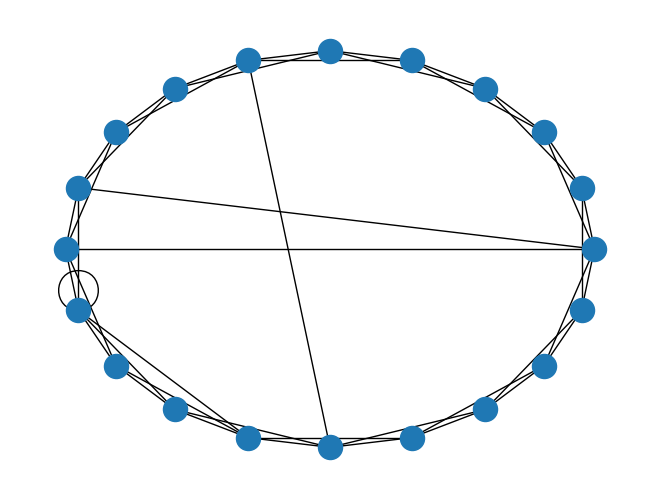

In [229]:
G = criaMundoPequeno(20,4,0.2)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

## 1.2 

(2) FindAllPathLengths(graph), que gera uma lista de todos os comprimentos (um
por par de nós no gráfico) usando repetidamente FindPathLengthsFromNode.Verifique sua função testando se o histograma de comprimentos de caminho em
𝑝 = 0 é constante para 0 < 𝑑 < 𝑁/𝑍, conforme esperado. Gere gráficos para
𝑁 = 1.000 e 𝑍 = 2 para 𝑝 = 0,02 e 𝑝 = 0,2; exiba os gráficos circulares e trace o
histograma de comprimentos de caminho. Amplie o histograma; o quanto ele
muda com p? Que valor de p você precisaria para obter “seis graus de separação”?

### p = 0

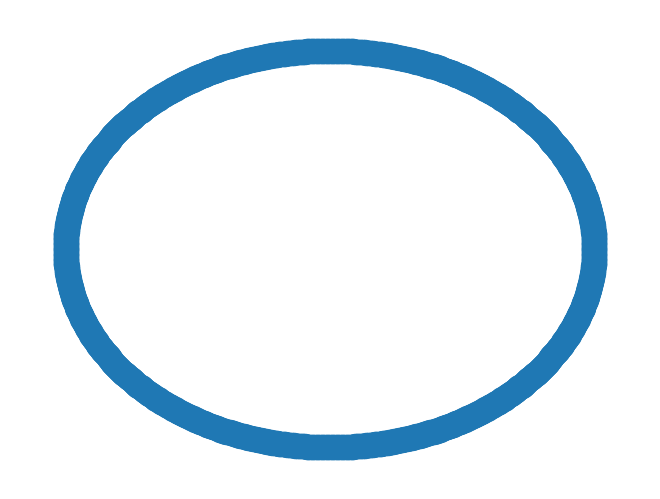

In [230]:
G = criaMundoPequeno(1000, 2, 0)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

Para p = 0, a distruibuição das distancias entres os nós devem ser contantes e estarem no intervalo 0 < d < Z/2

Como podemos ver o gráfico abaixo está de acordo com essa propriedade com todas as distancias ocorrendo igualmente

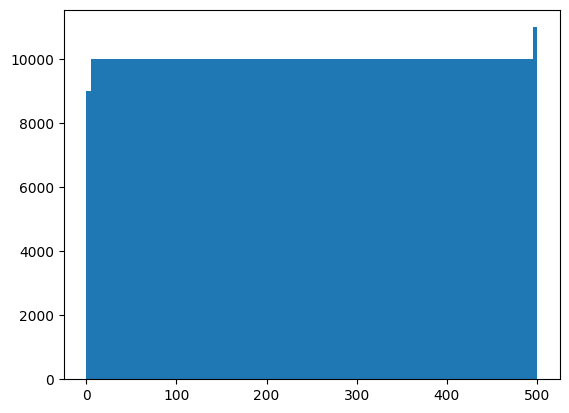

In [231]:
plt.hist(FindAllPathLengths(G).flatten(), bins=100)
plt.show()

### p = 0.02

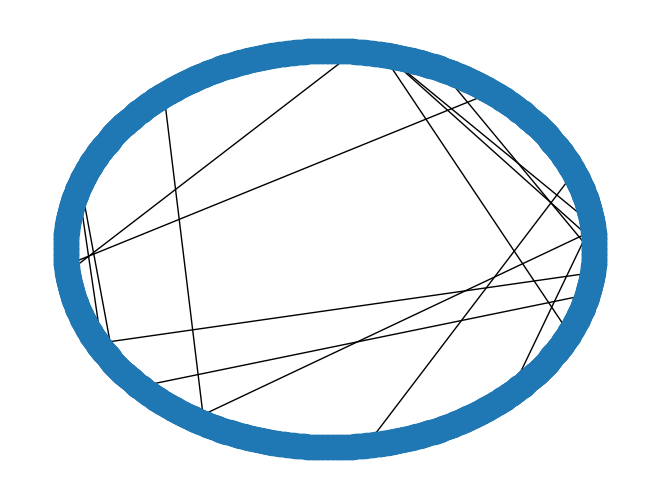

In [232]:
G = criaMundoPequeno(1000, 2, 0.02)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

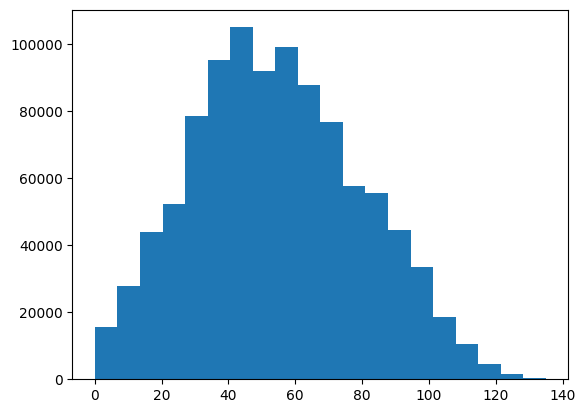

In [233]:
plt.hist(FindAllPathLengths(G).flatten(), bins = 20)
plt.show()

### p = 0.2

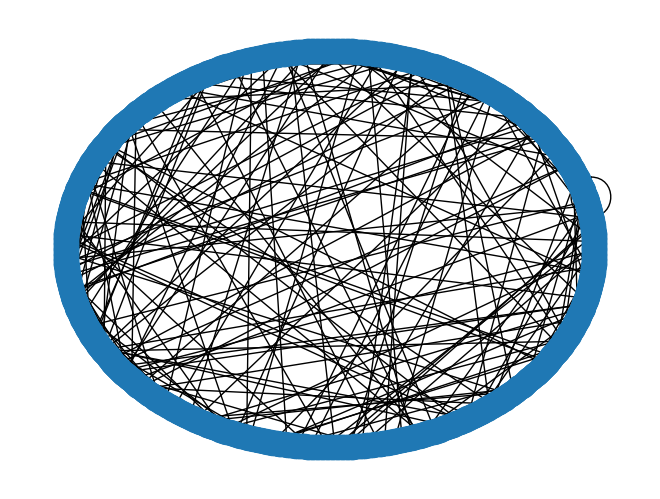

In [234]:
G = criaMundoPequeno(1000, 2, 0.2)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

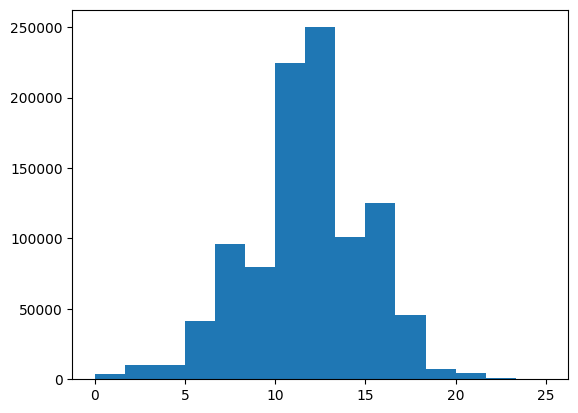

In [235]:
plt.hist(FindAllPathLengths(G).flatten(), bins=15)
plt.show()

Será necessário um p maior que 0.2 para garantir os seis graus de separação.


### 1.3

(3) FindAveragePathLength(graph), que calcula a média ⟨𝑑⟩ sobre todos os pares
de nós. Calcule 𝑑 para 𝑍 = 2, 𝑁 = 100 e 𝑝 = 0,1 algumas vezes; sua resposta
deve ser em torno de 𝑑 = 10. Observe que existem flutuações estatísticas
substanciais no valor de amostra para amostra. Aproximadamente quantas
arestas longas existem neste sistema? Você esperaria flutuações nas distâncias?

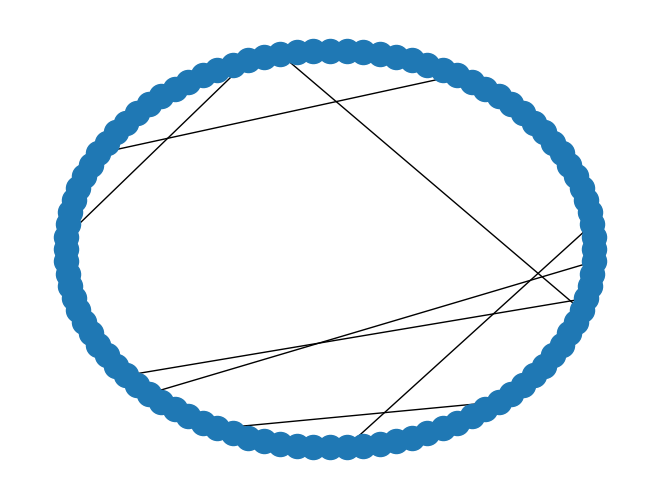

In [236]:
G = criaMundoPequeno(100, 2, 0.1)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

No sistema acima existiria aproximadamente 10 arestas longas, conforme as arestas são distribuidas no sistema deverá haver flutações em torno do d.
Pois se as arestas tiverem uma distribuição uniforme e fizerem ligações tangencias no sistema o falor de d será minimo.

In [237]:
# numRandomEdge = int(np.floor(N*(Z//2)*p))
print(f"Para a configuração N = 100, Z = 2 e p = 0.1 o Numero de arestas longas será {int(np.floor(100*(2//2)*0.1))}")

Para a configuração N = 100, Z = 2 e p = 0.1 o Numero de arestas longas será 10


In [238]:
d_values = []
for _ in range(40):
    G = criaMundoPequeno(100, 2, 0.1)
    d_values.append(FindAveragePathLength(G))

In [239]:
print(d_values)

[9.6694, 9.2268, 10.3064, 9.2108, 9.7578, 9.9176, 8.1722, 9.7646, 9.9956, 10.4332, 10.1906, 10.0458, 10.3024, 10.2798, 9.2156, 8.992, 9.2434, 9.8024, 9.4422, 9.011, 9.4276, 9.6882, 9.593, 9.147, 9.8098, 10.1558, 9.6954, 9.8864, 9.5816, 10.803, 10.5542, 9.4826, 9.1216, 10.1894, 10.1392, 8.7122, 9.8012, 11.6724, 8.785, 9.3014]


In [240]:
np.asarray(d_values).mean()

9.713165

## 1.4

(c) Plote o comprimento médio do caminho entre os nós 𝑑(𝑝) dividido por 𝑑(𝑝 = 0)
para 𝑍 = 2, 𝑁 = 50, em função de 𝑝 em um gráfico semi-log com valores entre 𝑝 =
0,001 e 𝑝 = 1000. (Dica : Sua curva deve ser semelhante à de Watts e Strogatz [3, Fig.
2], com os valores de 𝑝 deslocados por um fator de 100; veja a discussão do limite do
contínuo abaixo. Para visualizar melhor, gere valores de 𝑝 igualmente espaçados entre 10⁻³ e 10³" .) Por que o gráfico é fixado em um para 𝑝 pequeno?

In [241]:
num  = 50
p_values = np.logspace(-3, 3, num)
d_ratio = np.empty(num)
# Semilogx

In [242]:
p_values

array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])

In [243]:
# Grafico com p = 0
G_p0 = criaMundoPequeno(50, 2, 0)
d_p0 = FindAveragePathLength(G_p0)

In [244]:
for i in range(num):
    G = criaMundoPequeno(50, 2, p_values[i])
    d_ratio[i] = FindAveragePathLength(G) / d_p0

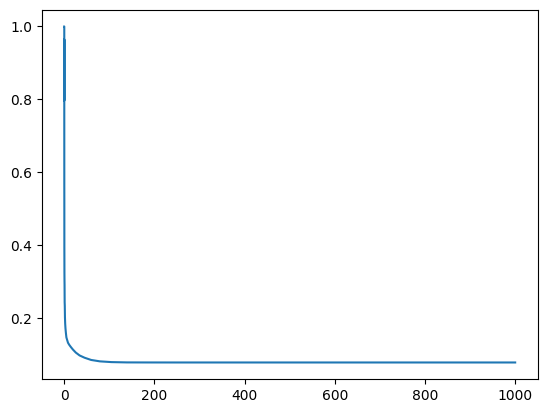

In [245]:


plt.plot(p_values, (d_ratio))
plt.show()

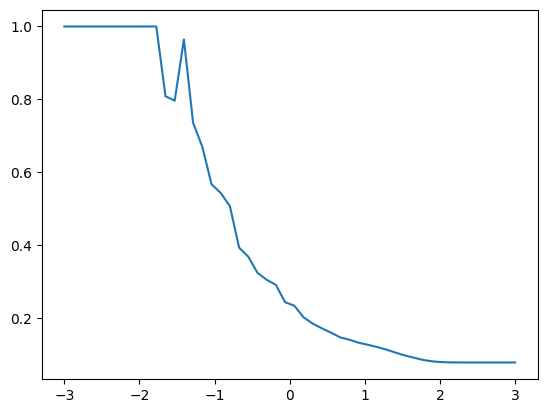

In [246]:
plt.plot(np.log10(p_values), d_ratio)
plt.show()

O gráfico é fixado em 1 para p pequeno por causa da divisão em d(p=0).

## Grande 𝑵 e a emergência de um limite contínuo

In [247]:
K = 2
N = 50

In [248]:
num  = 300
p_values = np.linspace(10**(-3), 10**3, num)

In [249]:
# Grafico com p = 0
G_p0 = criaMundoPequeno(N, K, 0)
d_p0 = FindAveragePathLength(G_p0)

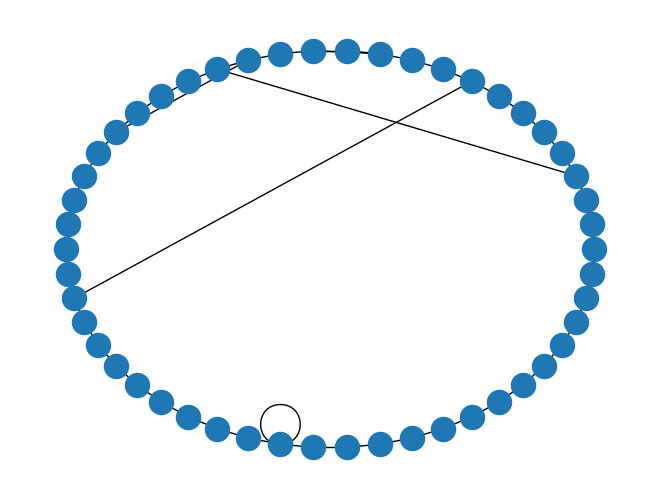

In [250]:
G = criaMundoPequeno(50, 2, 0.1)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

In [251]:
watts_strog_1 = nx.watts_strogatz_graph(1000, 10, 0.1)

In [252]:
watts_strog_2 = nx.watts_strogatz_graph(1000, 10, 0.001)

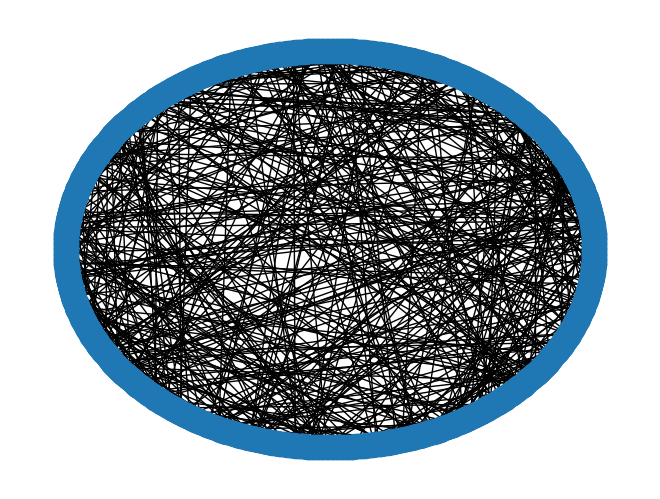

In [253]:
nx.draw(watts_strog_1, pos=nx.circular_layout(watts_strog_1))
plt.show()

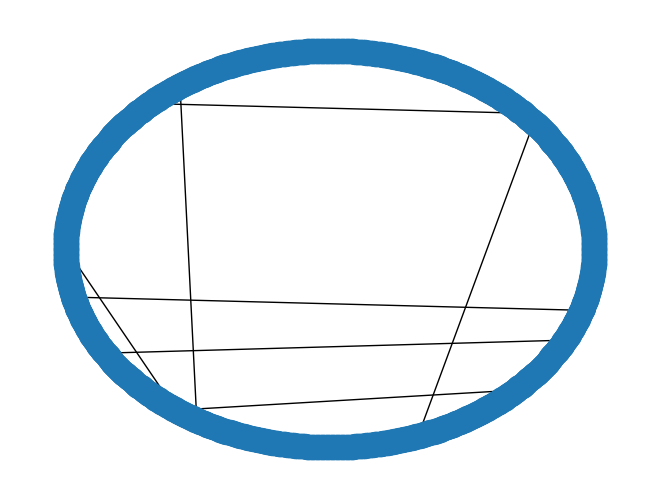

In [254]:
nx.draw(watts_strog_2, pos=nx.circular_layout(watts_strog_2))
plt.show()

O grafico de mundo pequeo de watts e strogatz com p = 0.001, se aproxima mais do grafico utilizado na parte(c), pois o numero de arestas longas é semelhante

In [255]:
num  = 50
p_values = np.logspace(-3, 3, num)
N_values = [100, 200]
Z_values = [2, 4]

mean_distance = []
path_resize = []

for N in N_values:
    for Z in Z_values:
        NZavg_dist = []
        NZPath = []
        for p in p_values:
            watts_strog = nx.watts_strogatz_graph(N, Z, p)
            d = FindAveragePathLength(watts_strog)
            NZavg_dist.append(d)
            NZPath.append(np.pi * Z * d / N)
        path_resize.append(NZPath)
        mean_distance.append(NZavg_dist)

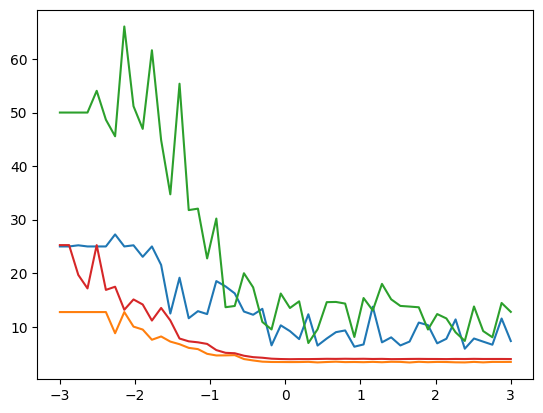

In [256]:
for dist in mean_distance:
    plt.plot(np.log10(p_values), dist)
plt.show()

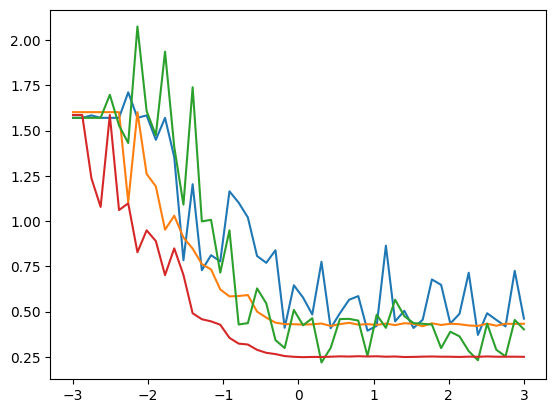

In [257]:
for dist in path_resize:
    plt.plot(np.log10(p_values), dist)
plt.show()

(e) Redes reais. Procure por uma rede real e encontre a distância média e o histograma
das distâncias entre os nós. 

O conjunto de dados contém todos os dados de votação da Wikipédia desde o início da Wikipédia até janeiro de 2008. Os nós na rede representam os usuários da Wikipédia e uma aresta direcionada do nó i para o nó j representa o usuário i votando no usuário j.

In [261]:
G = nx.read_edgelist('./soc-wiki-Vote.mtx', nodetype=int)

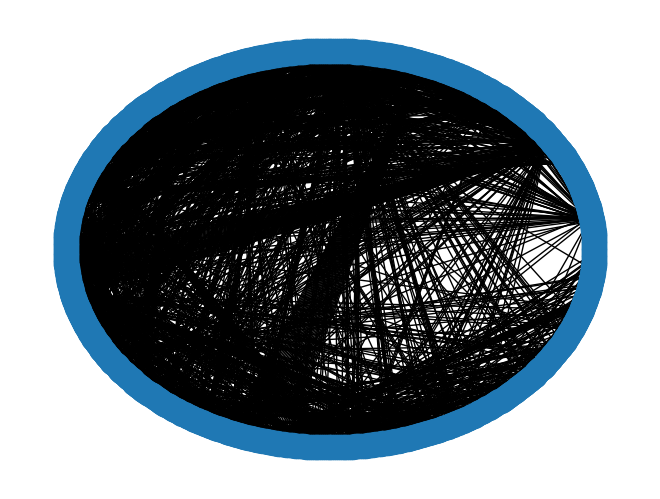

In [262]:
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

In [263]:
FindAllPathLengths(G)

TypeError: 'int' object is not iterable